In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno


# Importing Machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

### **Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bike_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lord AI Project - Evoastra Ventures (Opc)/Bike Share demand Prediction/Bike Data.csv')

In [ ]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### **Data Discription**

1. instant: record index
2.  dteday : date
3. season : season (1:spring, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2018, 1:2019)
5. mnth : month ( 1 to 12)
6.  holiday : weather day is a holiday or not
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
9. weathersit :
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
10. temp : temperature in Celsius
11. atemp: feeling temperature in Celsius
12. hum: humidity
13. windspeed: wind speed
14. casual: count of casual users (rented bike)
15. registered: count of online registered users to rent bike
16. cnt: count of total rental bikes including both casual and registered


In [ ]:
bike_data.shape

(730, 16)

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### **Null Values Chack**

In [ ]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### **Duplicate Value Check**

In [ ]:
bike_data.duplicated().sum()

0

From the above discription we can say that there is neither a null values nor a a duplicate values in the dataset.

In [ ]:
# Discribing data set
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#Rename the columns
bike_data.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [ ]:
#checking columns
bike_data.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [ ]:
bike_data.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Checking unique values
bike_data.nunique()

rec_id               730
datetime             730
season                 4
year                   2
month                 12
holiday                2
weekday                7
workingday             2
weather_condition      3
temp                 498
atemp                689
humidity             594
windspeed            649
casual               605
registered           678
total_count          695
dtype: int64

### **Data Wrangling**

In [ ]:
#mapping the vars - season,month,weathersit,weekday
bike_data['season']=bike_data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
bike_data['month']=bike_data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data['weather_condition']=bike_data.weather_condition.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_data['weekday']=bike_data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [ ]:
bike_data.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Drpping unwanted columns
bike_data.drop(columns=['rec_id', 'datetime'], inplace=True)
bike_data.shape

(730, 14)

Dropping rec_id because it is categorical unique values that is not usefull at all. And datetime infomation is already present in season, year, month and weekday columns.

# **Data Visualization**

In [ ]:
bike_data.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count'],
      dtype='object')

### **Univariate Analysis**

Text(0.5, 1.0, 'Count Of month')

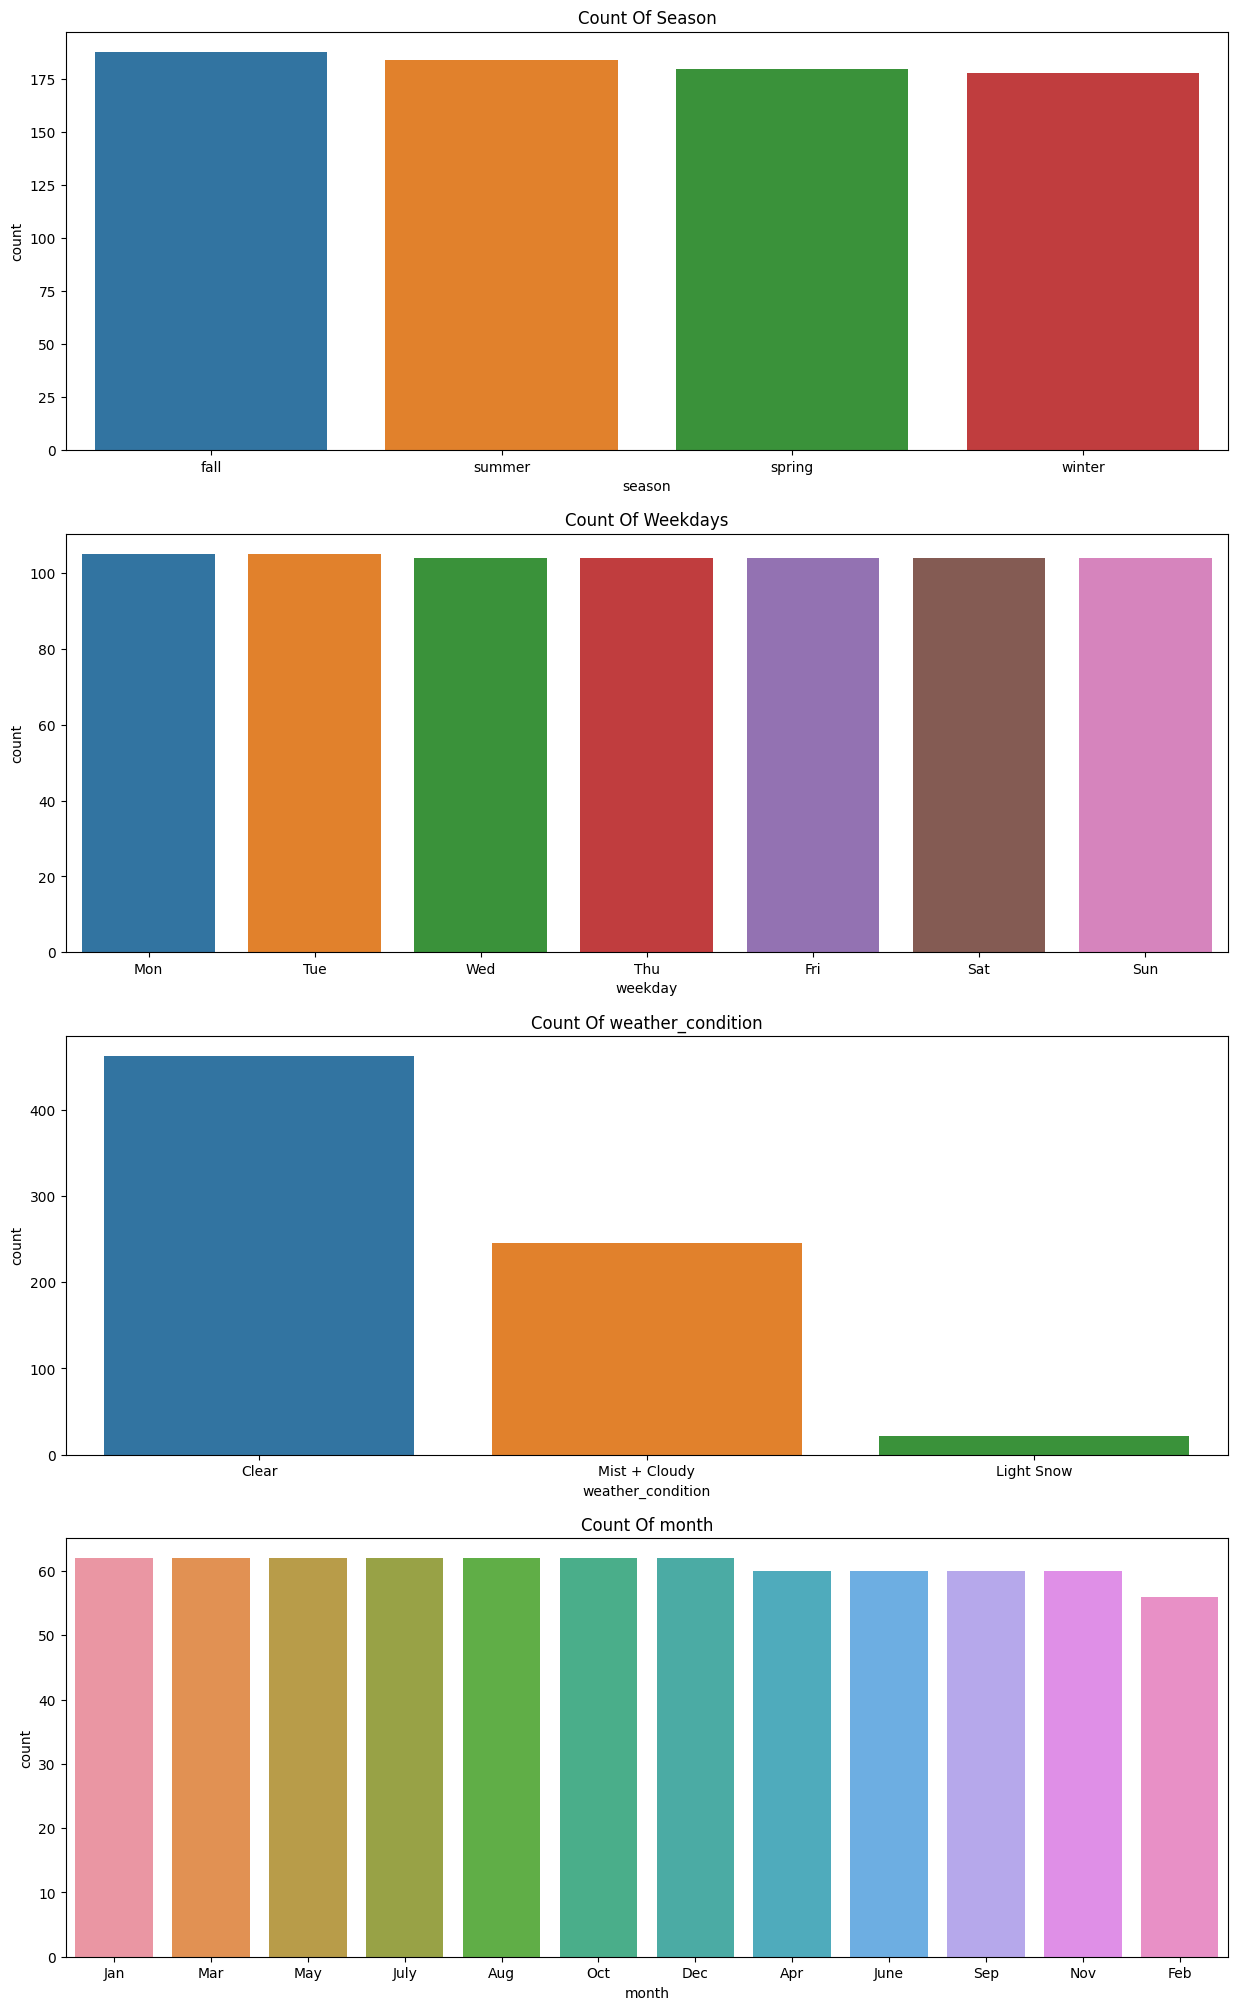

In [ ]:
# Count Plot of Categorical Columns

figure,ax=plt.subplots(nrows=4,ncols=1,figsize=(15,25))
sns.countplot(x='season',data=bike_data,ax=ax[0],order=bike_data['season'].value_counts().index)
ax[0].set_title('Count Of Season')

sns.countplot(x='weekday',data=bike_data,ax=ax[1],order=bike_data['weekday'].value_counts().index)
ax[1].set_title('Count Of Weekdays')

sns.countplot(x='weather_condition',data=bike_data,ax=ax[2],order=bike_data['weather_condition'].value_counts().index)
ax[2].set_title('Count Of weather_condition')

sns.countplot(x='month',data=bike_data,ax=ax[3],order=bike_data['month'].value_counts().index)
ax[3].set_title('Count Of month')

Appoximatly data is equally distributed to all the labels that are present in four columns only weather condition has more number of count in clear weather.

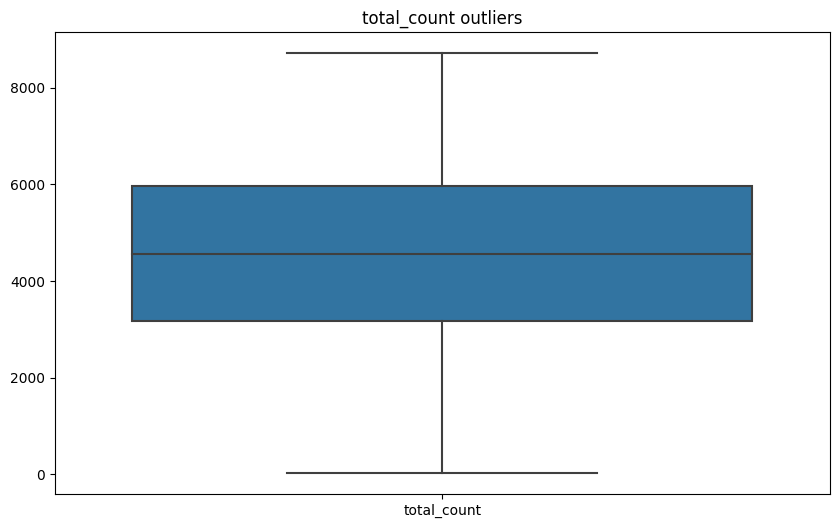

In [ ]:
#Boxplot for total_count outliers
fig,ax=plt.subplots(figsize=(10,6))

sns.boxplot(data=bike_data[['total_count']])
ax.set_title('total_count outliers')
plt.show()

From the boxplot we can say outliers are not present in total count columns. And the most of the value lies between 3000 to 6000.

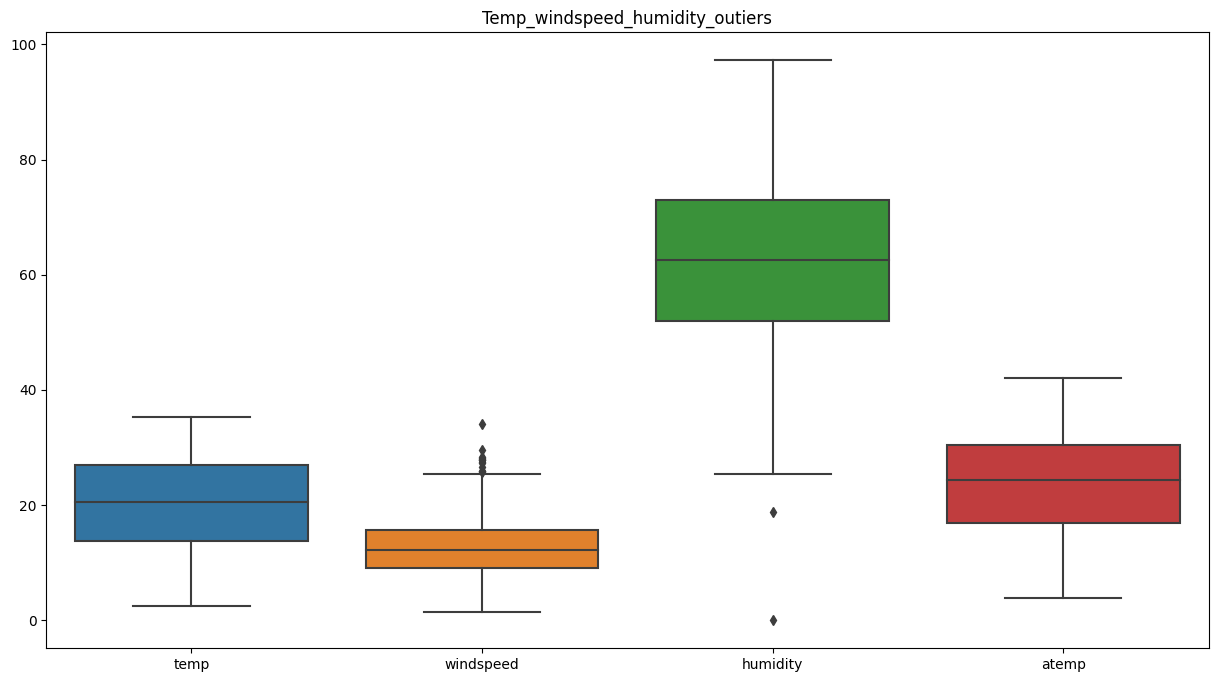

In [ ]:
#Box plot for temp, windspeed and humadity
fig,ax=plt.subplots(figsize=(15,8))

sns.boxplot(data=bike_data[['temp', 'windspeed', 'humidity', 'atemp']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

Humidity has outlier in it because humidity cannot be zero and windspeed in boxplot shows outliers but some cases, it will fluctuate with weather condition. And if talk about temp and atemp does not have any type of outlier in it.

In [ ]:
#Checking humidity column
bike_data[bike_data['humidity']==0]

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
68,spring,0,Mar,0,Sat,0,Light Snow,15.952731,19.2834,0.0,17.545759,46,577,623


In [ ]:
#Droping column because humidity cannot be zero at all.
bike_data.drop(68, inplace=True)

In [ ]:
bike_data.shape

(729, 14)

<ipython-input-24-ffa1799d5493>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_data['temp'],ax=ax[0], bins=100, color='green')
<ipython-input-24-ffa1799d5493>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_data['humidity'],ax=ax[1], bins=100, color='green')
<ipython-input-24-ffa179

<Axes: xlabel='windspeed', ylabel='Density'>

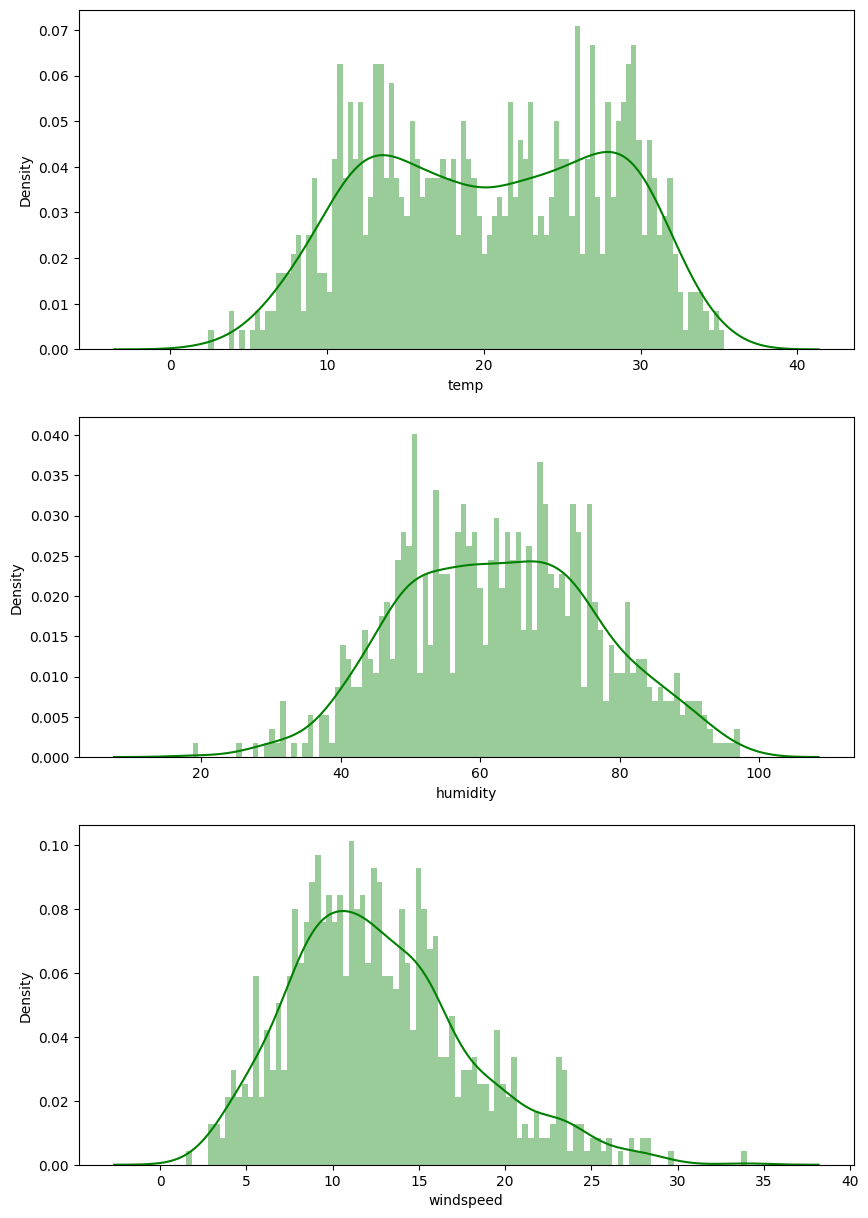

In [ ]:
#Distribution Check
figure,ax=plt.subplots(nrows=3,ncols=1,figsize=(10,15))

sns.distplot(bike_data['temp'],ax=ax[0], bins=100, color='green')

sns.distplot(bike_data['humidity'],ax=ax[1], bins=100, color='green')

sns.distplot(bike_data['windspeed'],ax=ax[2], bins=100, color='green')

from the above analysis we can say that columns Normally distributed.

### **Bivariate Analysis And Multivariate Analysis**

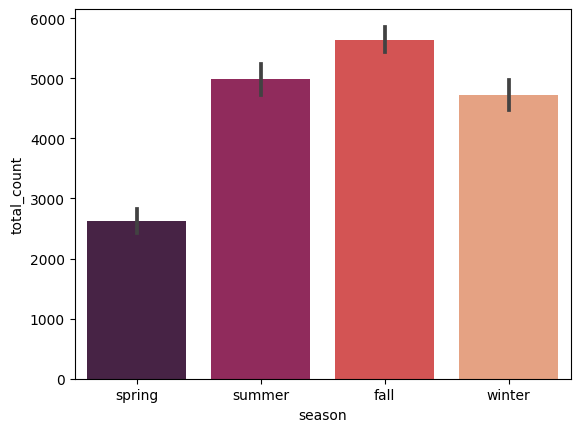

In [ ]:
# Analysis of season column
sns.barplot(x='season',y='total_count',data=bike_data,palette="rocket",)
plt.show()

From the above analysis we can say that most of the bookings are in fall season due to cooler weather

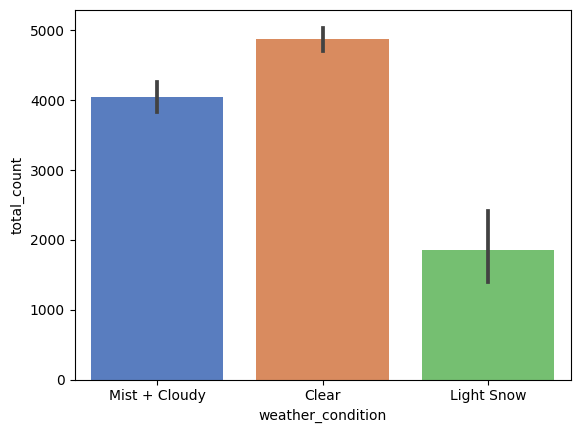

In [ ]:
#Relation between weather and count of bike rentals
sns.barplot(x='weather_condition',y='total_count',palette="muted",data=bike_data)
plt.show()

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and minimum booking in light snow and light rain weather.

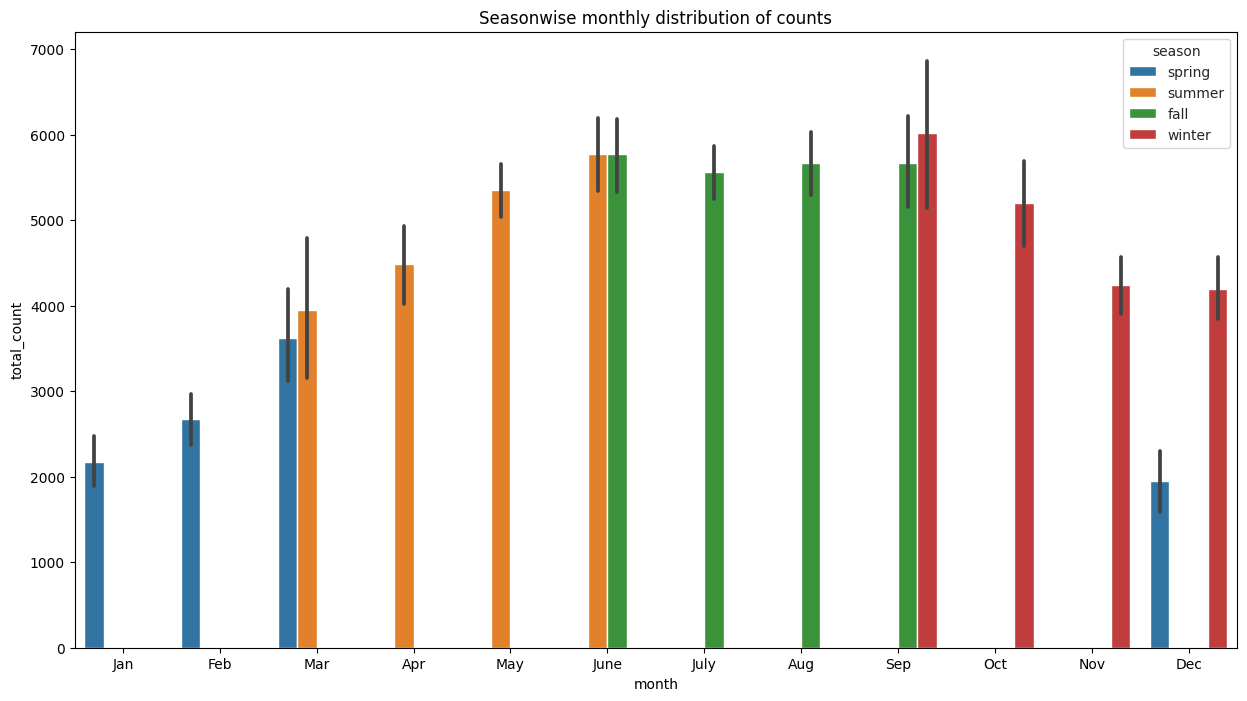

In [ ]:
#Bar plot for seasonwise monthly distribution of total_counts
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')

sns.barplot(x='month',y='total_count',data=bike_data[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()


From the above plot, we can observed that increasing the bike rental count in fall and summer season and then decreasing the bike rental count in spring and winter season.

In [ ]:
bike_data.total_count.value_counts()

5409    2
5115    2
6591    2
6536    2
6824    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: total_count, Length: 694, dtype: int64

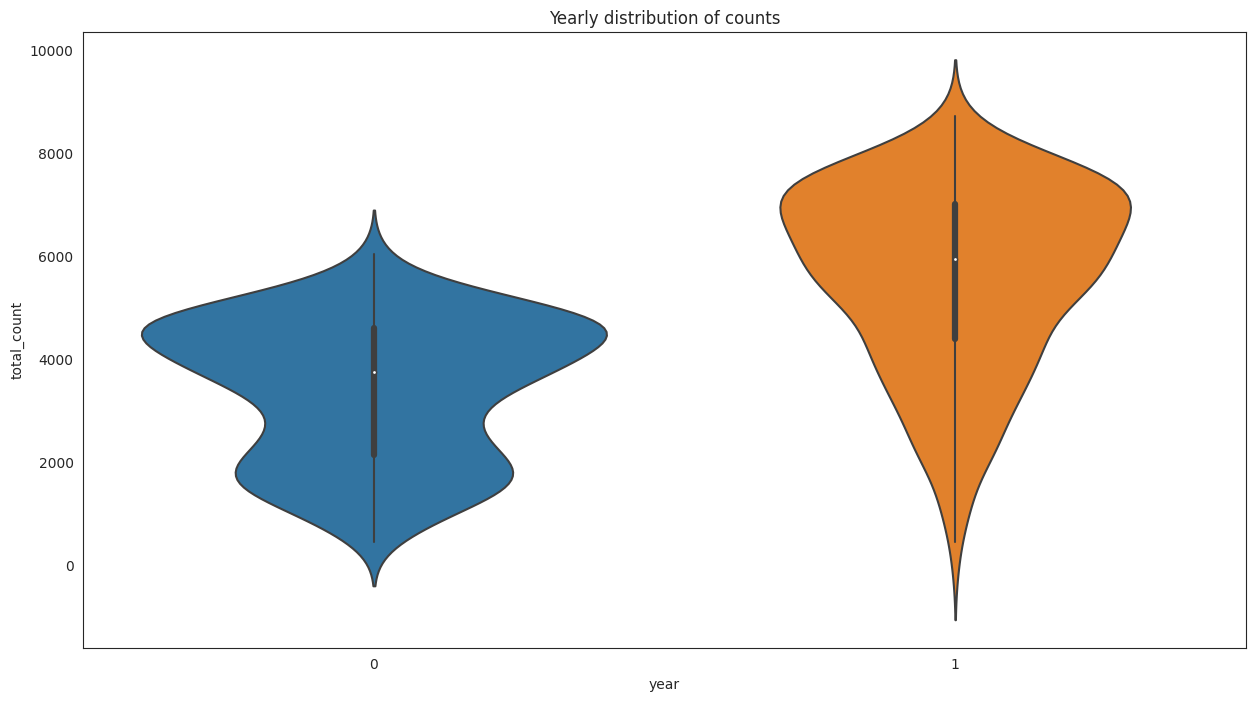

In [ ]:
#Violin plot for yearly distribution of total_counts
fig,ax=plt.subplots(figsize=(15,8))

sns.violinplot(x='year',y='total_count',data=bike_data[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

From the violin plot, we can observed that the bike rental count distribution is highest in year 2019 then in year 2018. Which means bussiness is growing day by day but due to covid face after 2019 it may affect the market scenario.

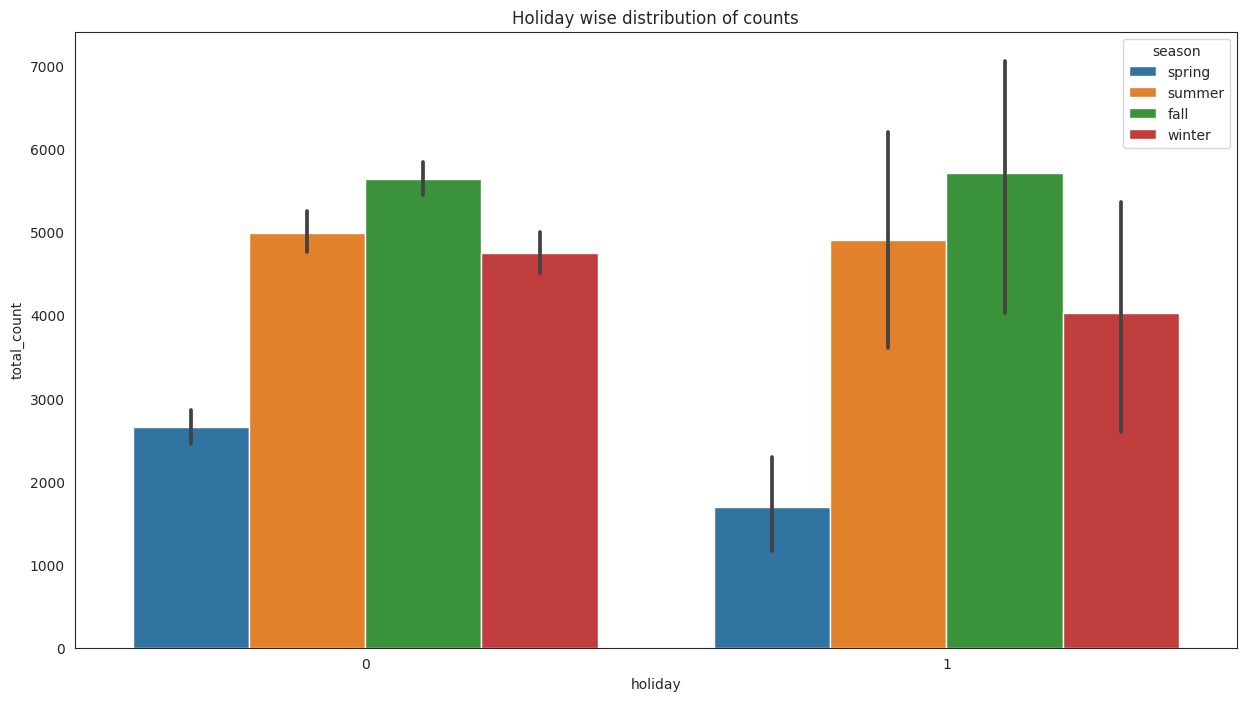

In [ ]:
#Barplot for Holiday distribution of total_counts
fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=bike_data,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons. In fall season it mostly rented.

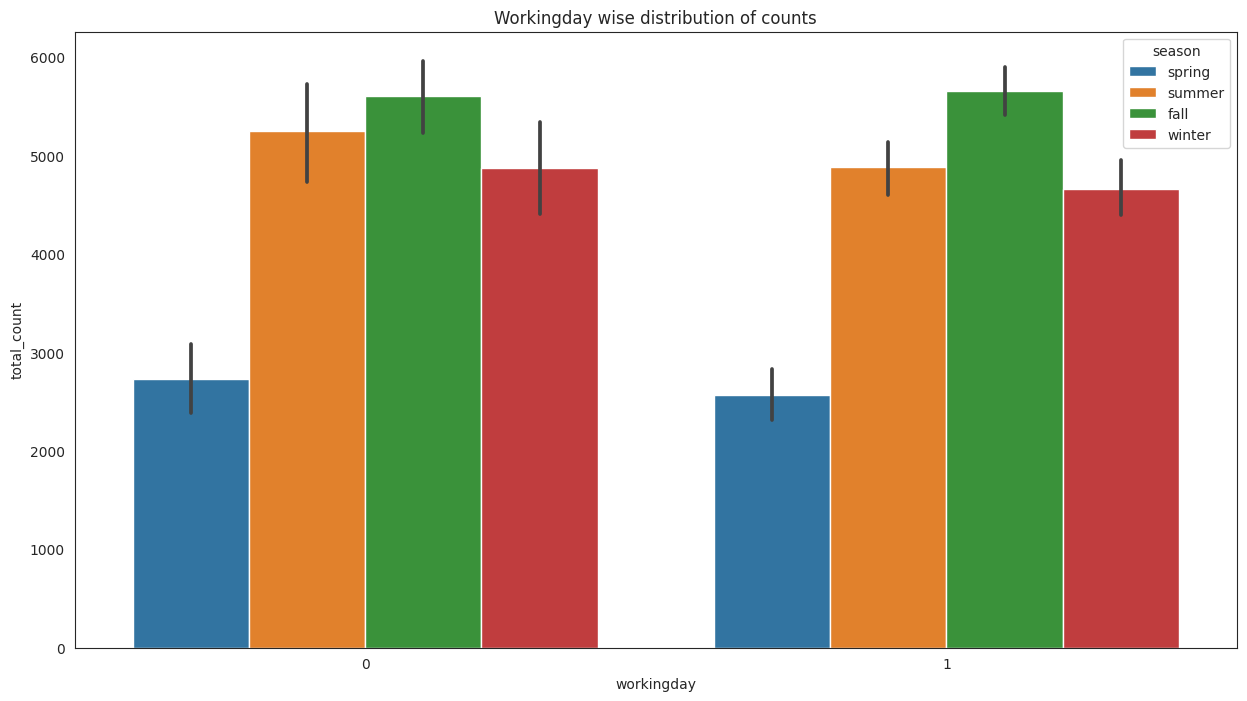

In [ ]:
#Bar plot for workingday distribution of counts
fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=bike_data,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.

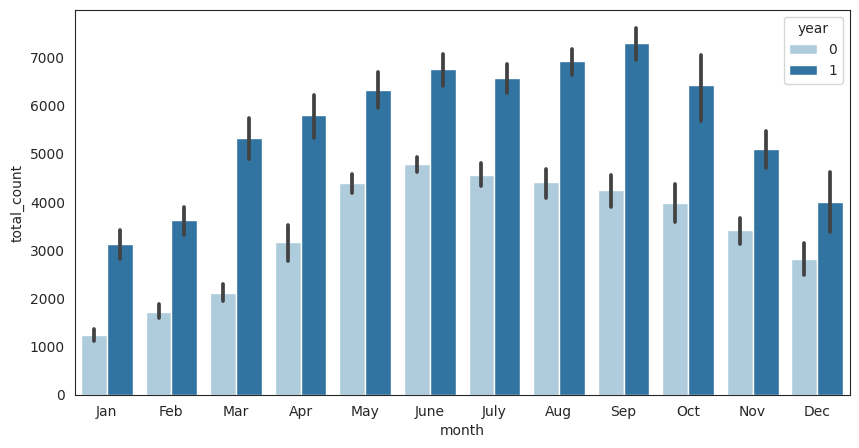

In [ ]:
#Relation between month and total bikes
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='total_count',hue='year',data=bike_data,palette='Paired')
plt.show()

From the above analysis we can say that demand of rented bike increases repidly as per time. And high demand of bike in between june to sept month.

In [ ]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


[Text(0.5, 1.0, 'Relation between humidity and users')]

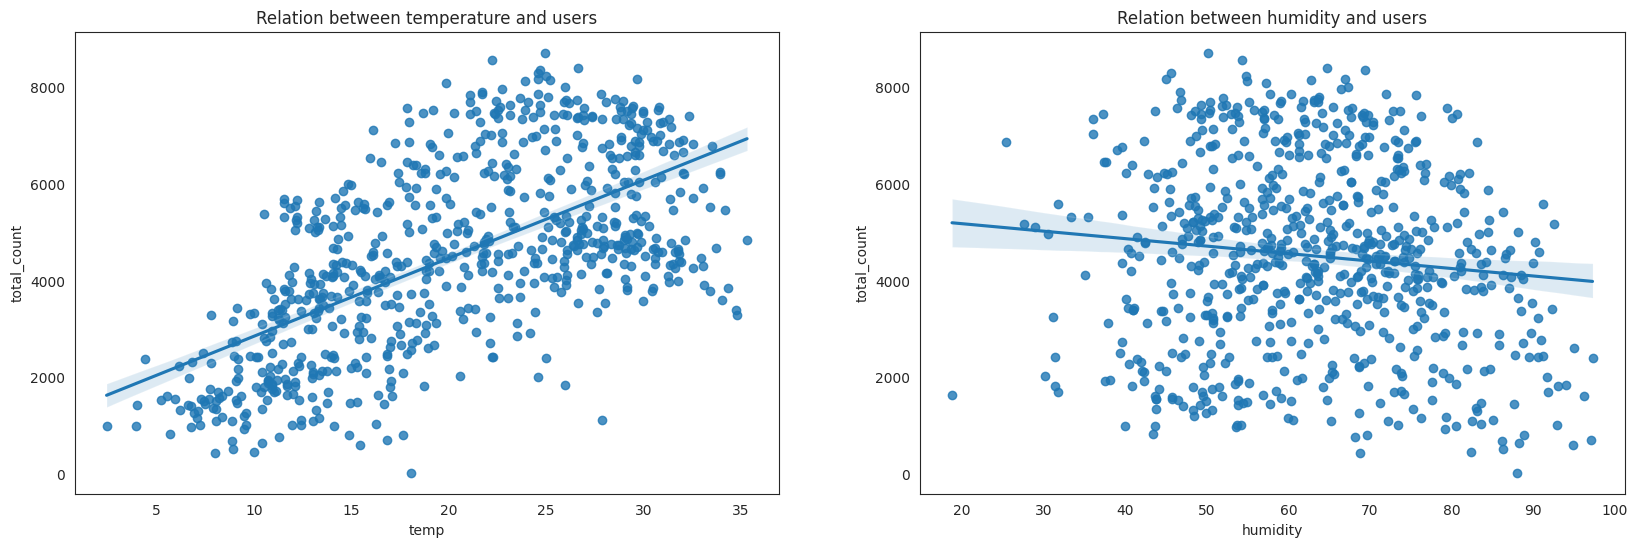

In [ ]:
#Distribution of total_count with humidity and temp
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=bike_data['temp'], y=bike_data['total_count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=bike_data['humidity'], y=bike_data['total_count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

From the above analysis we can say that temp and user has positive correlation between them and humidity and user has negative correlation between each other. And hence we can say that when temp increases total count also increases and when humidity increases total count of rented bike will decrease.

<ipython-input-36-a3f40edf193d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_data.corr(), cmap='RdYlGn', annot = True)


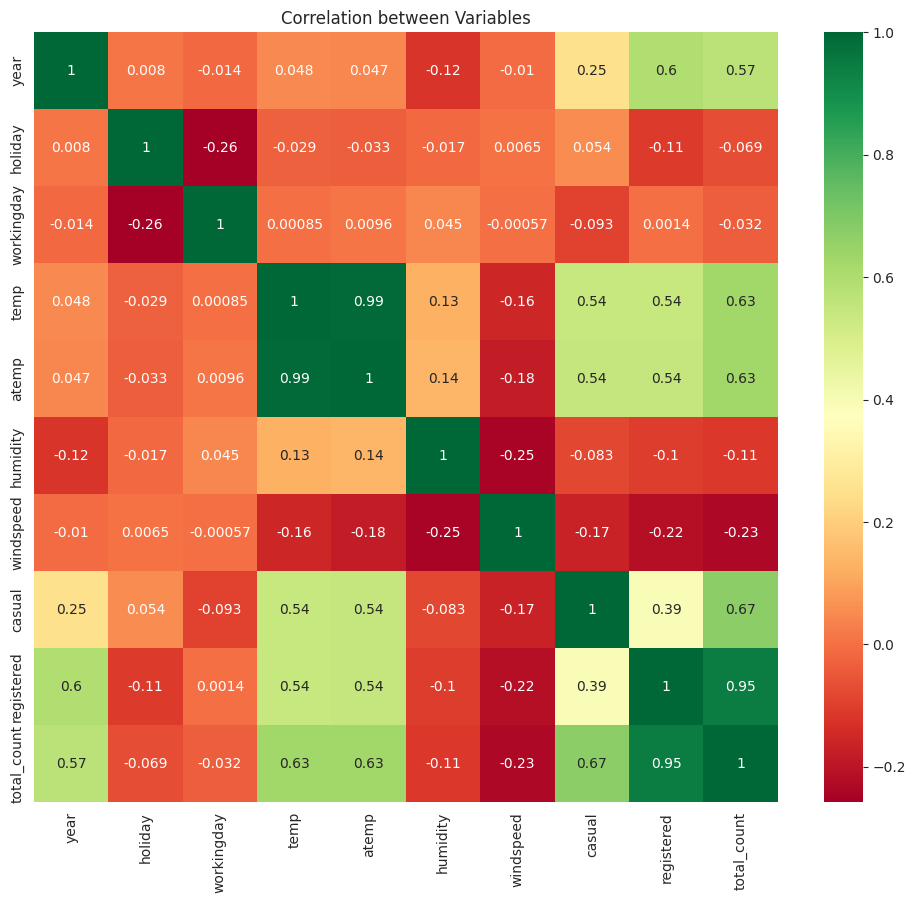

In [ ]:
#Heatmap to see correlation between variables
plt.figure(figsize=(12, 10))
sns.heatmap(bike_data.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

From the above analysis we can say that atemp and temp features are highly correlated to each other.

(i) temp and atemp (99%)

(ii) *casual + registered = total_count*

> causal and registered columns cause Multicollinearity.


      
      

In [ ]:
#Dropping columns which highly corelated
bike_data.drop(columns=['atemp', 'casual', 'registered'], inplace=True)

In [ ]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


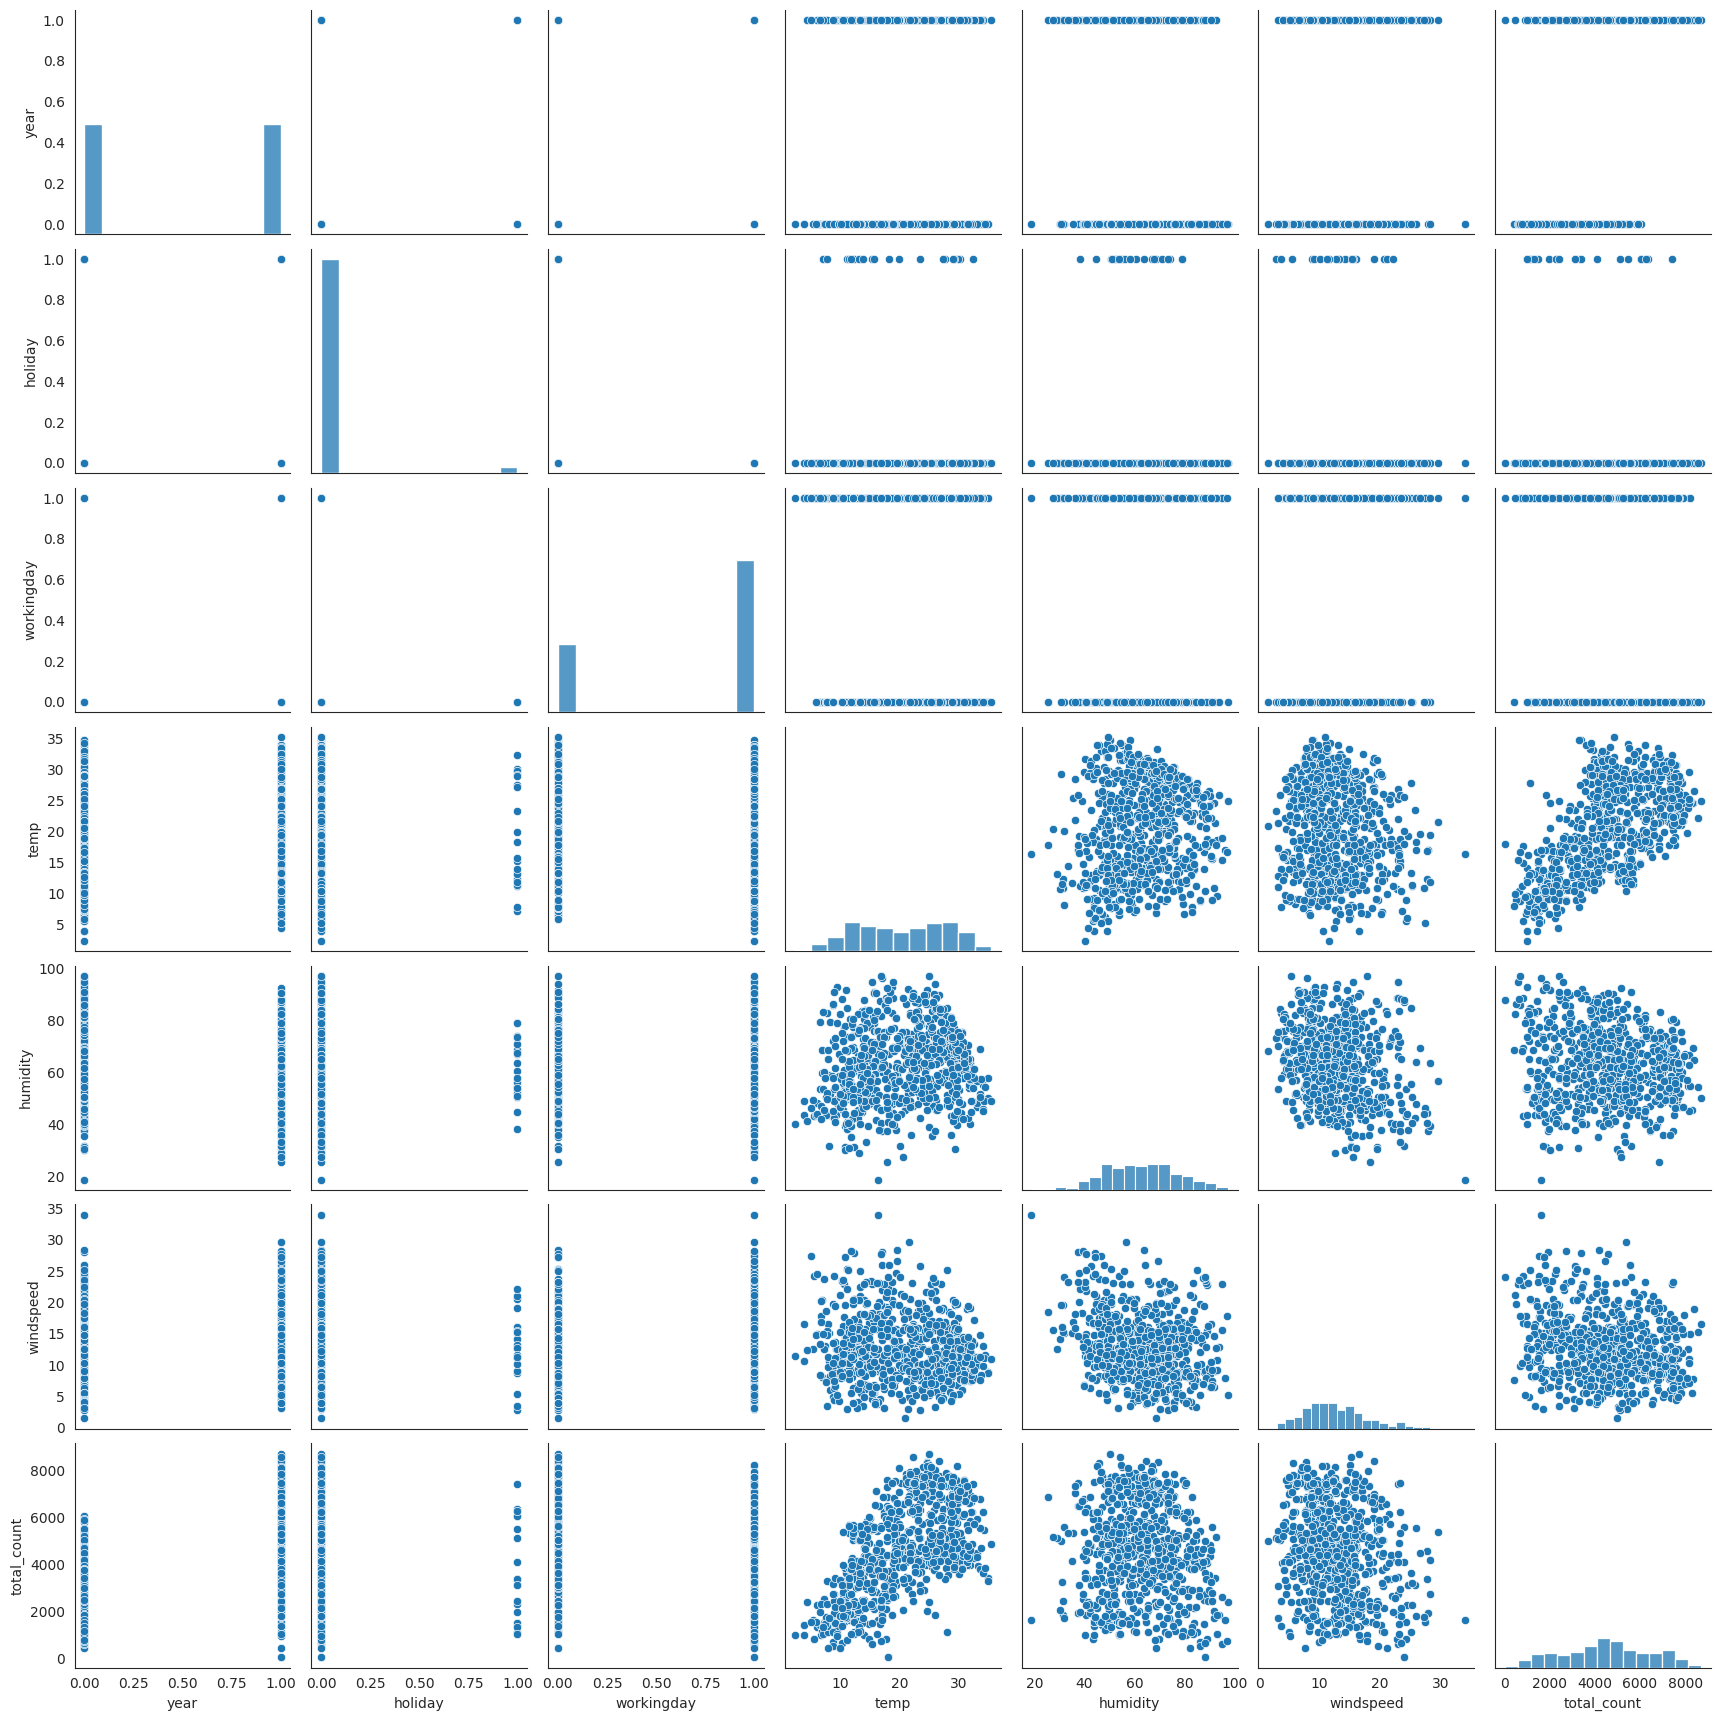

In [ ]:
# Pair Plot visualization
sns.pairplot(bike_data)

###**Hot Encoding**

In [ ]:
#Creating categorical variable
categorical_data=bike_data.select_dtypes(include='object')

In [ ]:
#Columns of categorical variable
categorical_data.columns

Index(['season', 'month', 'weekday', 'weather_condition'], dtype='object')

In [ ]:
#Getting dummies of categorical data
bike_data_dummies = pd.get_dummies(bike_data, columns=['season', 'month', 'weekday', 'weather_condition'])

In [ ]:
#Checking dataset
pd.set_option('display.max_columns', 100)
bike_data_dummies.head()

,year,holiday,workingday,temp,humidity,windspeed,total_count,season_fall,season_spring,season_summer,season_winter,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_condition_Clear,weather_condition_Light Snow,weather_condition_Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


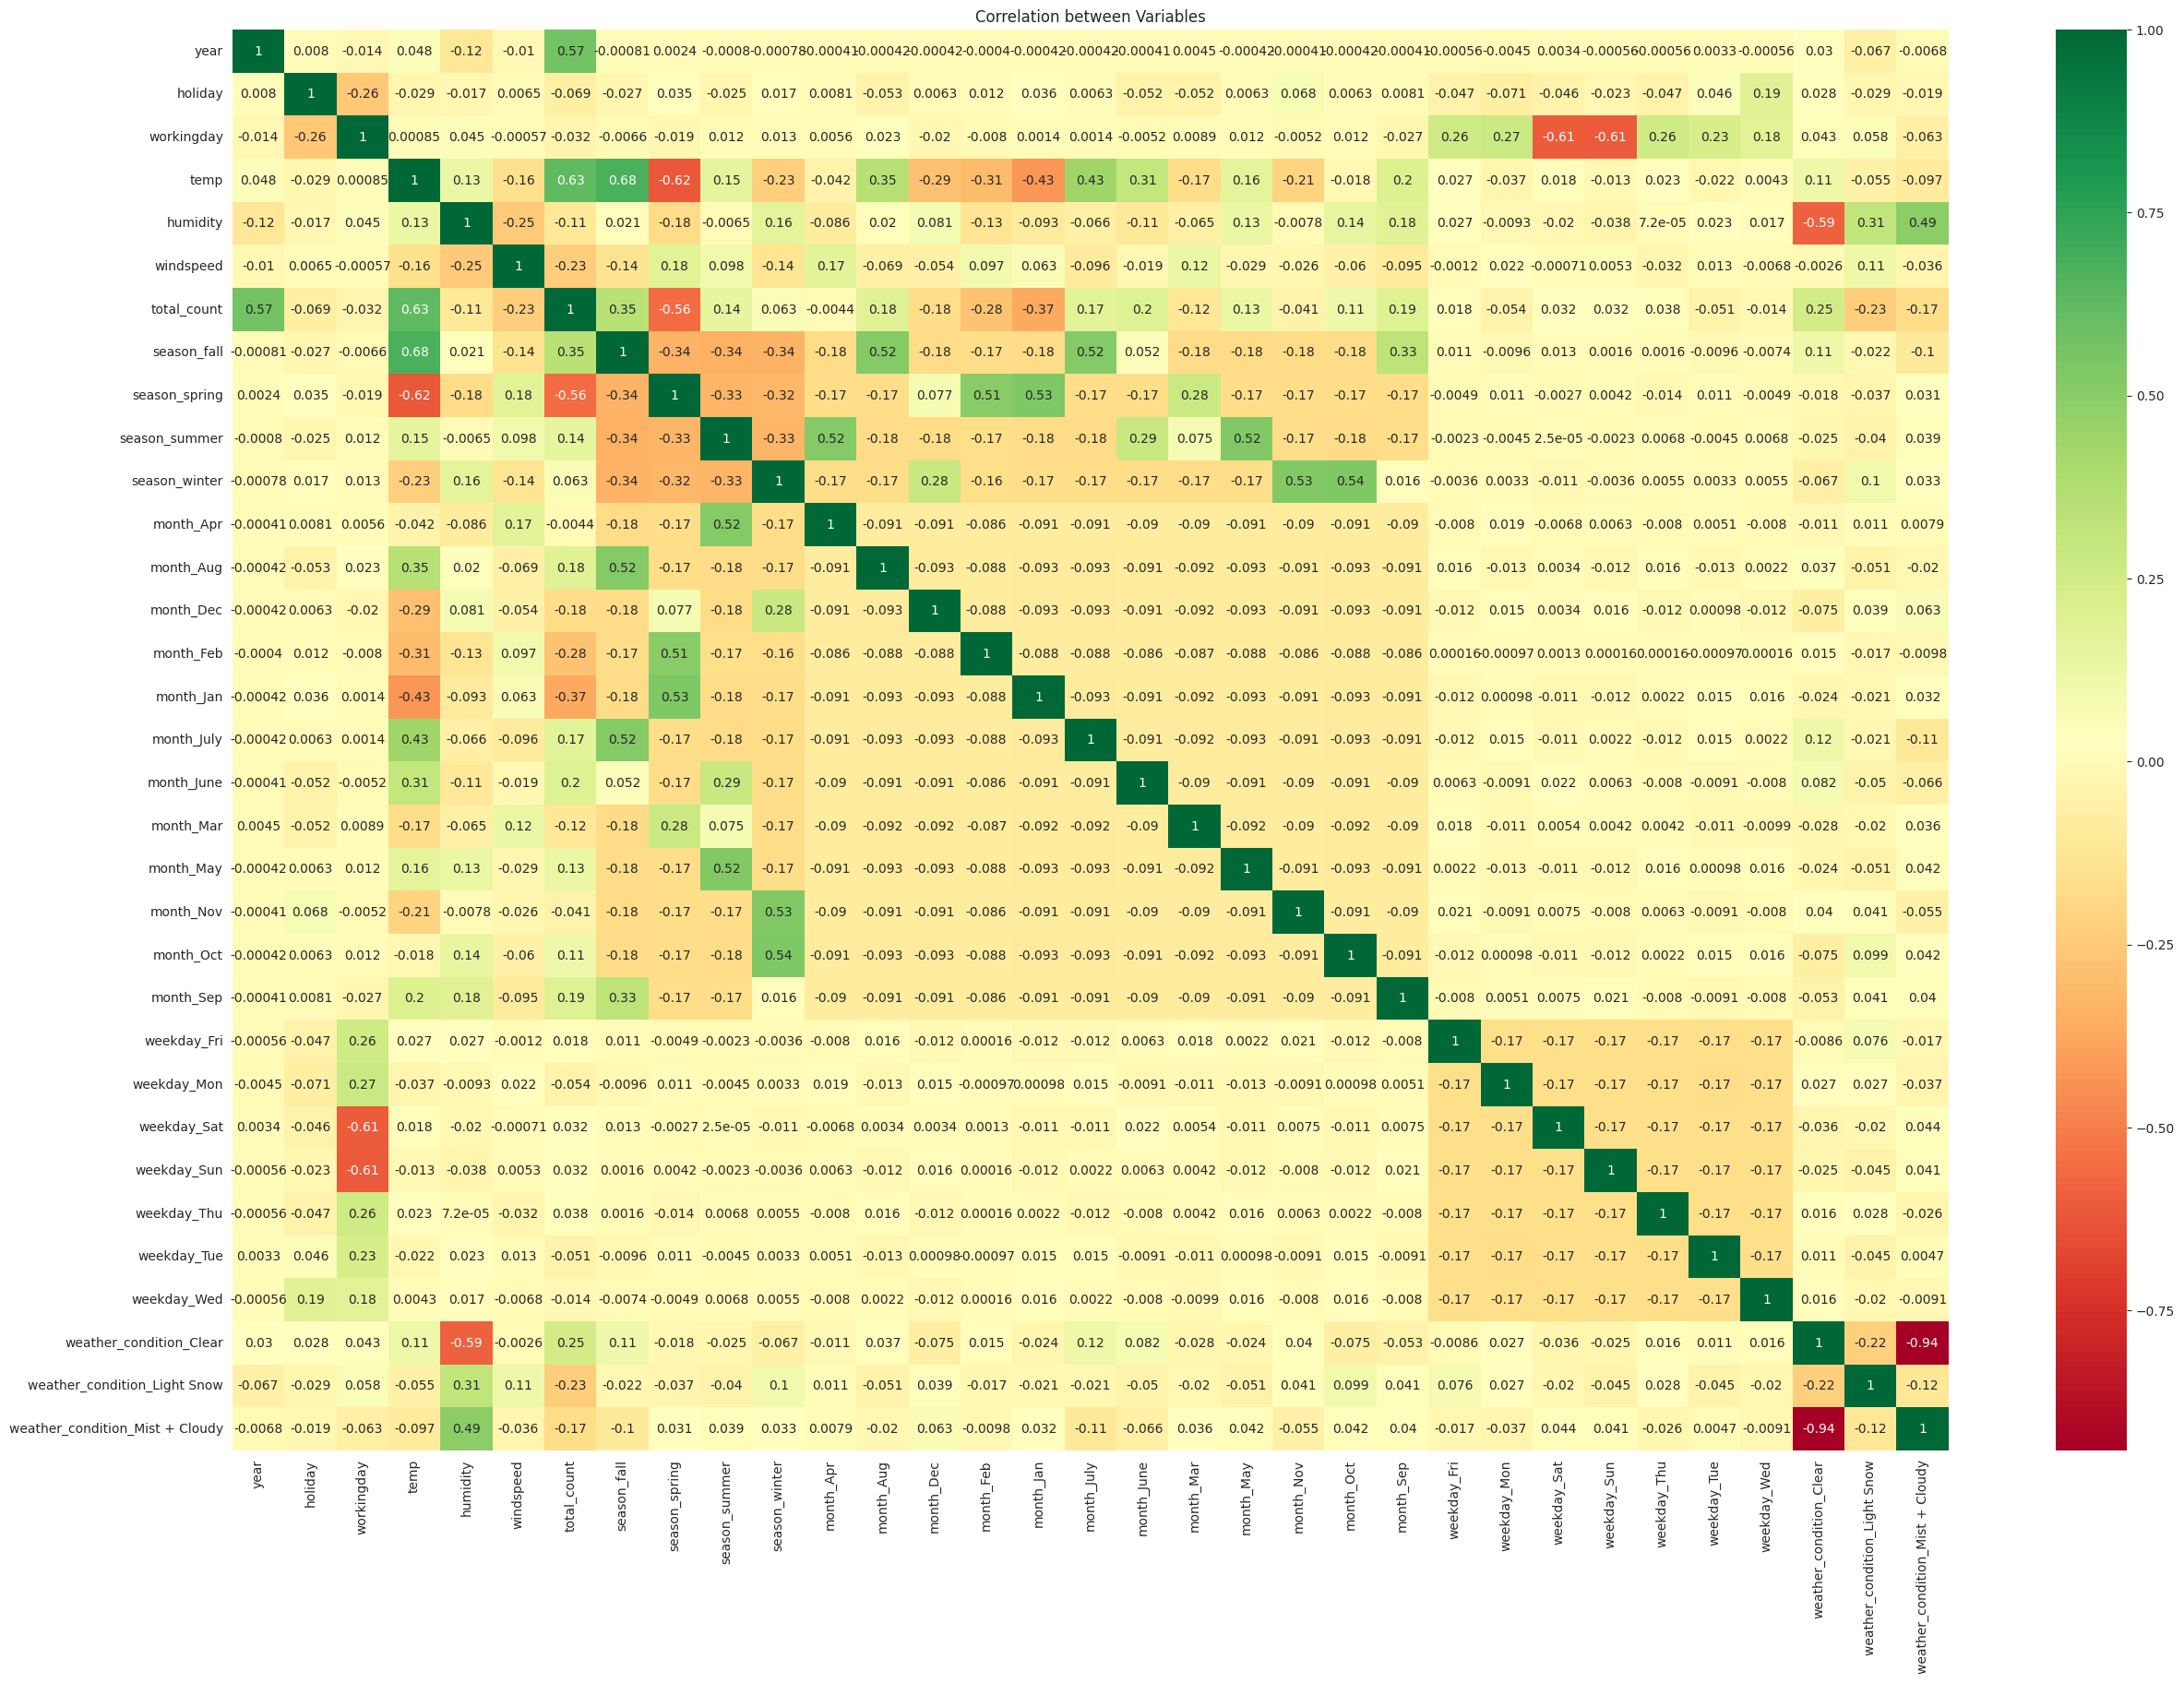

In [ ]:
# Again Checking correlation
plt.figure(figsize=(30, 20))
sns.heatmap(bike_data_dummies.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

###**Rescaling the features**

In [ ]:
bike_data_dummies.head()

,year,holiday,workingday,temp,humidity,windspeed,total_count,season_fall,season_spring,season_summer,season_winter,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_condition_Clear,weather_condition_Light Snow,weather_condition_Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
#minMax the scale
scaler=MinMaxScaler()
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','total_count']

#fit on data
bike_data_dummies[num_vars]=scaler.fit_transform(bike_data[num_vars])
bike_data_dummies.head()

,year,holiday,workingday,temp,humidity,windspeed,total_count,season_fall,season_spring,season_summer,season_winter,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_condition_Clear,weather_condition_Light Snow,weather_condition_Mist + Cloudy
0,0,0,1,0.355170,0.787573,0.284606,0.110792,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0.379232,0.647694,0.466215,0.089623,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0.171000,0.317820,0.465740,0.152669,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,0.175530,0.513034,0.284297,0.177174,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0.209120,0.317417,0.339143,0.181546,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


###**Data Splitting**

In [ ]:
bike_data_dummies.shape

(729, 33)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=bike_data_dummies.drop('total_count',axis=1)  #Independent Variables
y=bike_data_dummies['total_count']   #Dependent variable
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(583, 32)
(146, 32)


###**Linear Regression Model**

In [ ]:
#Fitting the model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#Checking score
reg.score(X_train, y_train)

0.8408022334226739

In [ ]:
# Finding coefficient
reg.coef_

array([ 2.24364028e-01, -1.62057063e-01, -8.87365608e-02,  4.16631544e-01,
       -1.72830882e-01, -1.75810858e-01, -4.58762085e+10, -4.58762085e+10,
       -4.58762085e+10, -4.58762085e+10, -3.42905780e+11, -3.42905780e+11,
       -3.42905780e+11, -3.42905780e+11, -3.42905780e+11, -3.42905780e+11,
       -3.42905780e+11, -3.42905780e+11, -3.42905780e+11, -3.42905780e+11,
       -3.42905780e+11, -3.42905780e+11, -4.91467742e+10, -4.91467742e+10,
       -4.91467742e+10, -4.91467742e+10, -4.91467742e+10, -4.91467742e+10,
       -4.91467742e+10,  2.74610013e+12,  2.74610013e+12,  2.74610013e+12])

In [ ]:
#finding predictions using X_test
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([0.3359375 , 0.60058594, 0.42773438, 0.70214844, 0.79101562,
       0.79394531, 0.65820312, 0.16308594, 0.12011719, 0.13476562,
       0.64941406, 0.55957031, 0.59423828, 0.63769531, 0.45556641,
       0.13330078, 0.76123047, 0.38378906, 0.45996094, 0.48291016,
       0.54980469, 0.32275391, 0.57226562, 0.66992188, 0.2890625 ,
       0.66455078, 0.64160156, 0.68457031, 0.07861328, 0.37304688,
       0.34423828, 0.57128906, 0.68408203, 0.76855469, 0.83837891,
       0.63476562, 0.52783203, 0.33007812, 0.24658203, 0.13378906,
       0.13916016, 0.53369141, 0.59912109, 0.81005859, 0.5546875 ,
       0.7578125 , 0.62646484, 0.31494141, 0.56103516, 0.71582031,
       0.76855469, 0.81494141, 0.61230469, 0.33886719, 0.75097656,
       0.48388672, 0.59179688, 0.20410156, 0.62939453, 0.77783203,
       0.57714844, 0.62011719, 0.49658203, 0.1015625 , 0.59228516,
       0.82666016, 0.71875   , 0.82177734, 0.81152344, 0.69921875,
       0.76464844, 0.60205078, 0.41064453, 0.43261719, 0.40332

In [ ]:
#Finding error
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.008363328247446782
RMSE : 0.09145123425873913


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7884748450629574
Adjusted R2 :  0.7285739162312286


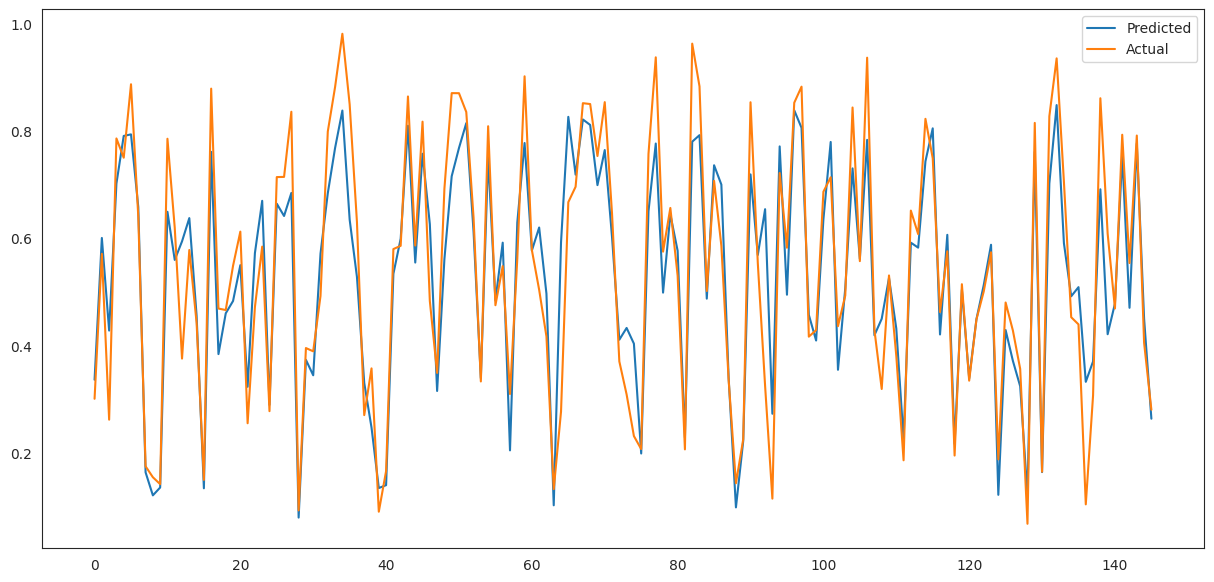

In [ ]:
# Graph
plt.figure(figsize=(15,7))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

### **Conclusion**

(i) Most of the rentals are for commuting to workshops and colleges on a daily basis. So boombikes should launch more stations near these landmarks to reach out to their main customers.

(ii) Planning for more sharing bikes to stations must consider the peak rental hours, i.e., 7-9 am and 5-6 pm.

(iii) The offer should not be a fixed price. Instead, it should be based on seasonal variations to promote bike usage during the fall and winter seasons.
Data about the most used routes can help build roads/lanes dedicated to bikes specifically.

(iv) Due to the low usage of bikes at night, it would be better to do bike maintenance at night. Removing some bikes from the streets at night time will not cause trouble for the customers.

(v) Converting registered customers to casual customers on the weekends by providing them with discounts and coupons.